In [1]:
import pandas as pd
pd.options.display.max_columns=50
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib import cm
import seaborn as sns

# load info samples 
with open("../data/samples_untreated_updated.json") as f:
    d_untreated=json.load(f)
with open("../data/samples_mechanisms_updated.json") as f:
    d_mechanisms=json.load(f)



In [2]:
def counts(grp):
    total=[]
    for i,t in enumerate(d_type_mech):
        total.append(len(set(d_type_mech[t]).intersection(set(grp))))
    return total

d_type_mech={"Chemotherapy":["Platinum","Pyrimidine_antagonist","Taxane","Anthracycline","Alkylating","Topoisomerase_inhibitor","Alkaloid", 
                             "Folate_antagonist","Microtubule_inhibitor","Antitumor_antibiotic","Vinca_Alkaloid"],
             "Targeted therapy":["Anti_VEGF","Anti_EGFR","Anti_HER2","mTOR_inhibitor","CDK4__6_inhibitor","Multikinase_inhibitor","MEK_inhibitor",
                                "BRAF_inhibitor","PARP_inhibitor","Anti_PDGFR","PARP_inhibitor","ALK__ROS1_inhibitor"],
                             "Immunotherapy":["Immunotherapy"],
             "Hormone therapy":["Selective_ER_modulator",'Aromatase_inhibitor','Anti_AR__GnRH'],
            }
colors_glob={"Chemotherapy":"#ef8a62","Targeted therapy":"#67a9cf","Hormone therapy":"#999999","Immunotherapy":"#cc0000"}
# all treatements
s=set()
for d in d_mechanisms:
    s=s.union(set(d_mechanisms[d]))


### Summary dataframe

In [22]:
l_summary=[]
for tt in d_mechanisms:
    if len(d_mechanisms[tt]) >0 :
        f=False
        for m in d_mechanisms[tt]:
            x=len(d_mechanisms[tt][m])
            c=counts([m])
            l_summary.append([tt,m,x,x>=10]+c)
df_summary = pd.DataFrame(l_summary,columns=["cancer_type_code","drug","n_treated_samples","is_group"]+list(d_type_mech.keys()))
df_summary["is_subtype"]=df_summary["cancer_type_code"].str.contains("_")
df_summary

,cancer_type_code,drug,n_treated_samples,is_group,Chemotherapy,Targeted therapy,Immunotherapy,Hormone therapy,is_subtype
0,BRCA,Platinum,64,True,1,0,0,0,False
1,BRCA,Pyrimidine_antagonist,288,True,1,0,0,0,False
2,BRCA,Taxane,367,True,1,0,0,0,False
3,BRCA,Anthracycline,387,True,1,0,0,0,False
4,BRCA,Alkylating,385,True,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...
87,COREAD_MSS,Platinum,269,True,1,0,0,0,True
88,COREAD_MSS,Pyrimidine_antagonist,305,True,1,0,0,0,True
89,COREAD_MSS,Anti_VEGF,192,True,0,1,0,0,True
90,COREAD_MSS,Topoisomerase_inhibitor,132,True,1,0,0,0,True


In [23]:
df_summary[df_summary["is_subtype"]==False].shape

(59, 9)

In [24]:
df_summary[df_summary["is_subtype"]==True].shape

(33, 9)

In [25]:
df_summary.shape

(92, 9)

### Prepare color and labels

In [26]:
list_c=["#702963","#e8c8e2","#d1b2cb","#a892a4", "#808080", "#B4C424","#d0de57", "#98FB98", "#228B22", "#008080", "#000080", "#40E0D0", "#87CEEB", "#FFB6C1", "#FF00FF", "#F33A6A", "#36454F", "#6F8FAF", "#A95C68","#314175", "#8A9A5B", "#8B0000", "#FFC000", "#80461B", "#E49B0F", "#C2B280", "#EE4B2B"]
ttypes_o = ["BRCA","BRCA_ERpos","BRCA_HER2pos","BRCA_TNB", "GBM", "COREAD","COREAD_MSS", "ESCA", "STAD", "CHOL", "LIHC", "PAAD", "PANET", "CESC", "OV","UCEC", "HNSC", "KIRC", "LUAD","LUSC", "DLBCL", "PRAD", "SKCM", "LMS", "LPS", "THCA", "BLCA"] # by paper order
d_colors = dict(zip(ttypes_o,list_c))

### Read results

In [27]:
results = pd.read_csv("../results/data/table_all_TEDS.tsv",sep="\t")
results=results[results["is_TED"]]
r=results[["cancer_type_code","drug"]].drop_duplicates().set_index("cancer_type_code")

In [28]:
r1=results[["cancer_type_code","drug","is_subtype"]].drop_duplicates()
r1["found_TED"] = True
df_summary=df_summary.merge(r1,how="left").fillna(False)
df_summary[["cancer_type_code","drug","n_treated_samples","Chemotherapy","Targeted therapy","Immunotherapy","Hormone therapy","found_TED"]].sort_values(["cancer_type_code","n_treated_samples"],ascending=[True,False]).to_csv("../data/info_treatment_groups_selected.tsv",sep="\t",index=False)

In [29]:
df_summary

,cancer_type_code,drug,n_treated_samples,is_group,Chemotherapy,Targeted therapy,Immunotherapy,Hormone therapy,is_subtype,found_TED
0,BRCA,Platinum,64,True,1,0,0,0,False,False
1,BRCA,Pyrimidine_antagonist,288,True,1,0,0,0,False,True
2,BRCA,Taxane,367,True,1,0,0,0,False,True
3,BRCA,Anthracycline,387,True,1,0,0,0,False,False
4,BRCA,Alkylating,385,True,1,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...
87,COREAD_MSS,Platinum,269,True,1,0,0,0,True,False
88,COREAD_MSS,Pyrimidine_antagonist,305,True,1,0,0,0,True,False
89,COREAD_MSS,Anti_VEGF,192,True,0,1,0,0,True,True
90,COREAD_MSS,Topoisomerase_inhibitor,132,True,1,0,0,0,True,False


In [10]:
r1.shape

(33, 5)

In [11]:
r1[r1["is_subtype"]]["cancer_type"].unique()

array(['Breast cancer ER+/HER2-', 'Breast cancer triple negative',
       'Colorectal cancer MSS'], dtype=object)

In [12]:
len(r1["drug"].unique())

19

In [13]:
results[results["is_TED"]].shape

(61, 25)

### Visualize the pie chart (Fig. 5a)

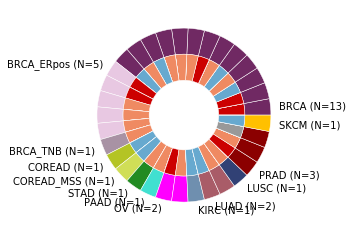

In [14]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

v,c,labels, v1 =[],[],[], []
cmap = plt.cm.tab20_r
outer_colors = cmap(np.arange(3)*4)
inner_colors = colors_glob.values()

for tt in ttypes_o:
    if tt in r.index:
        f=False
        k=list(r.loc[tt][["drug"]].values)
        if len(k) == 1:
            k=[k]
        for m in k:
            v.append(1)
            if len(m)>0:
                v1.append(counts(m))
            else:
                v1.append(counts([m]))
            c.append(d_colors[tt])
            if not(f):
                labels.append(tt+f" (N={len(k)})")
            else:
                labels.append("")
            f=True
            
        
wd, _=ax.pie(v, radius=1, colors=c,
       wedgeprops=dict(width=size, edgecolor='w'),labels=labels)

for w in wd:
    w.set_linewidth(0.5)
    w.set_edgecolor('white')
wd, _=ax.pie(np.array(v1).flatten(), radius=1-size, colors=inner_colors,       wedgeprops=dict(width=size, edgecolor='w'))

for w in wd:
    w.set_linewidth(0.5)
    w.set_edgecolor('white')
plt.savefig(f'../results/figures/pie_results.pdf', dpi=800,bbox_inches="tight")

#plt.show()


### Save list of drivers to substrat them from the dps analysis

In [17]:
results["gene_driver"] = results.apply(lambda r: r["label"].split("-")[0].split(" ")[0],axis=1)

In [19]:
results[results["is_subtype"]==False][["gene_driver","cancer_type_code","type_alt"]].drop_duplicates().to_csv("../results/data/list_drivers_resistance.tsv",sep="\t",index=False)